<a href="https://colab.research.google.com/github/petroDavydov/goit-DeepLearningForComputerVisionAndNLP/blob/main/eds1_conspect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis (EDA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

import warnings
# filter warnings
warnings.filterwarnings('ignore')


In [28]:
df = pd.read_csv('/content/drive/MyDrive/Deep Learning for Computer Vision and NLP/Module_1_Lecture_2_Class_Spaceship_Titanic.csv')
df = df.set_index('PassengerId')


In [29]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [30]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [31]:
df.shape

(8693, 13)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 1.1+ MB


In [33]:
TARGET = 'Transported'
FEATURES = [col for col in df.columns if col != TARGET]

text_features = ["Cabin", "Name"]
cat_features = [col for col in FEATURES if df[col].nunique() < 25 and col not in text_features ]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25 and col not in text_features ]

print(f'Number of categorical features: {len(cat_features)}')
print('Categorical features:', cat_features, '\\n')
print(f'Number of continuos features: {len(cont_features)}')
print('Continuos features:', cont_features, '\\n')
print(f'Number of text features: {len(text_features)}')
print('Text features:', text_features)

Number of categorical features: 4
Categorical features: ['HomePlanet', 'CryoSleep', 'Destination', 'VIP'] \n
Number of continuos features: 6
Continuos features: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] \n
Number of text features: 2
Text features: ['Cabin', 'Name']


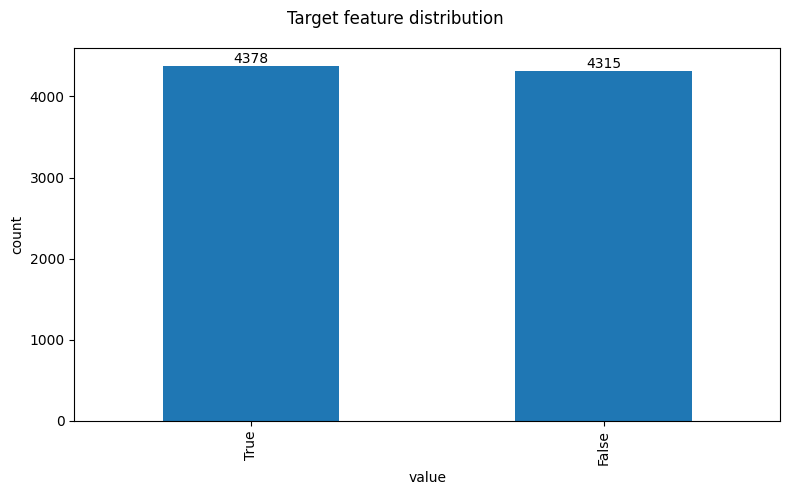

In [34]:
ax = df[TARGET].value_counts().plot(kind='bar', figsize=(8, 5))
for i in ax.containers:
  ax.bar_label(i)
  ax.set_xlabel("value")
  ax.set_ylabel("count")

plt.suptitle("Target feature distribution")

plt.tight_layout()
plt.show()

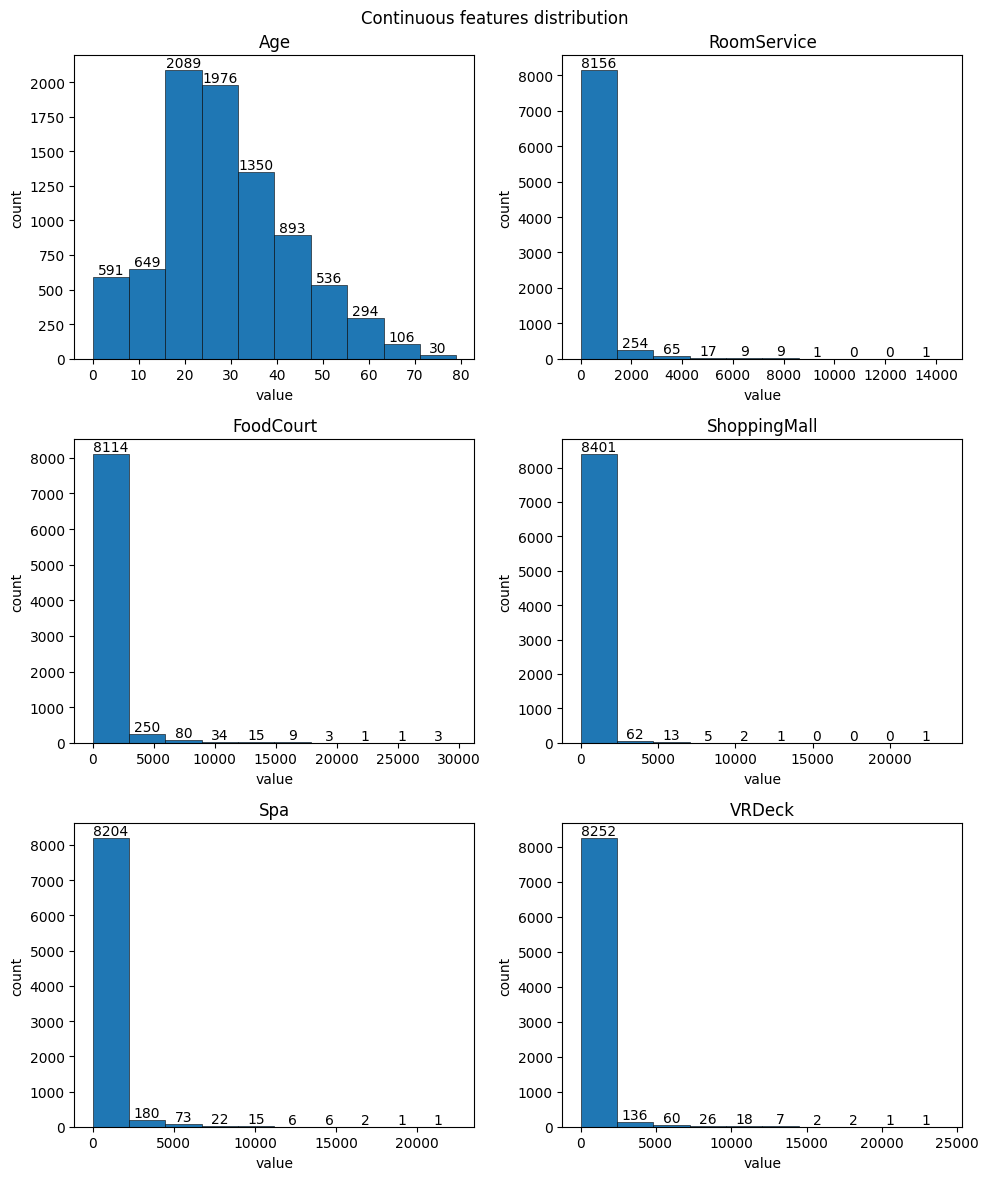

In [35]:
ax = df.loc[:, cont_features].hist(figsize=(10, 12), grid=False, edgecolor='black', linewidth=.4)
for row in ax:
  for col in row:
    for i in col.containers:
      col.bar_label(i)
      col.set_xlabel("value")
      col.set_ylabel("count")

plt.suptitle("Continuous features distribution")

plt.tight_layout()
plt.show()

In [36]:
services_features = cont_features[1:]

for feature in services_features:
    df[f'used_{feature}'] = df.loc[:, feature].apply(lambda x: 1 if x > 0 else 0)

In [37]:
df.loc[:, cont_features + ['CryoSleep', 'VIP', TARGET]].corr().style.background_gradient()
df.loc[:, cont_features + ['CryoSleep', 'VIP', TARGET]].corr().style.background_gradient()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.074273,0.092819,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.252396,0.058785,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,-0.211510,0.129799,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,-0.212514,0.018295,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.203991,0.061059,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.198857,0.125974,-0.207075
CryoSleep,-0.074273,-0.252396,-0.211510,-0.212514,-0.203991,-0.198857,1.000000,-0.081402,0.468645
VIP,0.092819,0.058785,0.129799,0.018295,0.061059,0.125974,-0.081402,1.000000,-0.037650
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,0.468645,-0.037650,1.000000
